In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


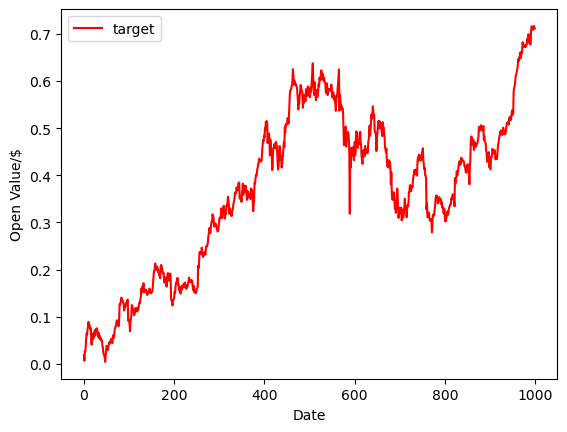

In [3]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

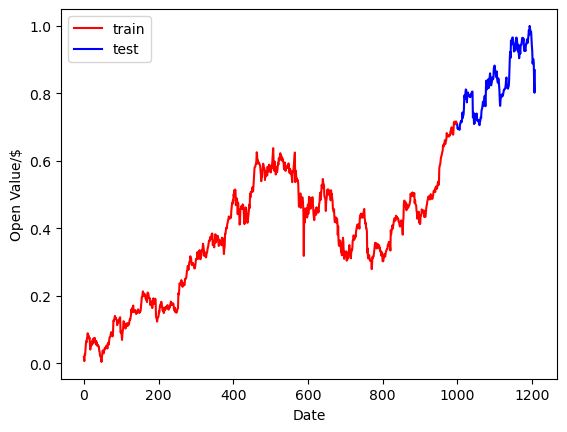

In [4]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [32]:
history=model.fit(train_data,train_target,epochs=50,validation_data=(test_data,test_target))

Epoch 1/50
32/32 [==============================] - 12s 138ms/step - loss: 0.0393 - val_loss: 0.0128
Epoch 2/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0041 - val_loss: 0.0111
Epoch 3/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 4/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 5/50
32/32 [==============================] - 3s 85ms/step - loss: 0.0030 - val_loss: 0.0120
Epoch 6/50
32/32 [==============================] - 3s 83ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 7/50
32/32 [==============================] - 3s 83ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/50
32/32 [==============================] - 3s 83ms/step - loss: 0.0030 - val_loss: 0.0062
Epoch 9/50
32/32 [==============================] - 3s 87ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 10/50
32/32 [==============================] - 3s 84ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 1

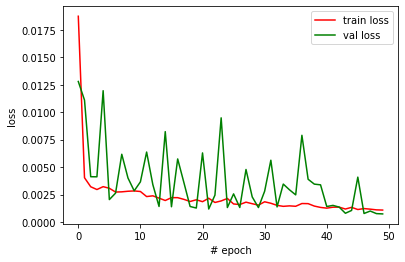

In [33]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9005308467454235


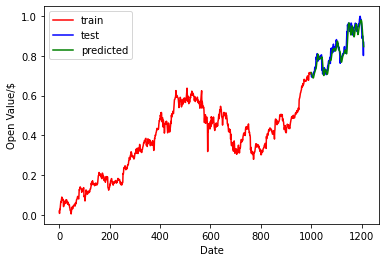

In [35]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

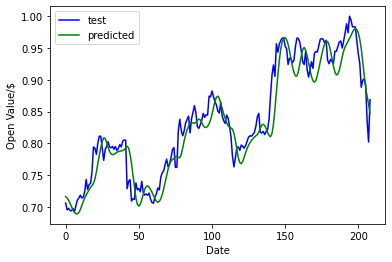

In [36]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [37]:
model.save('LSTM-Stock-Market.model')

INFO:tensorflow:Assets written to: LSTM-Stock-Market.model\assets


INFO:tensorflow:Assets written to: LSTM-Stock-Market.model\assets


In [24]:
test_data=[[]]

result=model.predict(test_data)

IndexError: list index out of range